## Exercises

Continue working in your `hypothesis_testing` notebook.

1. Use the `telco_churn` data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?
1. Use the `employees` database.
    - Is there a relationship between how long an employee has been with the company and their salary?
    - Is there a relationship between how long an employee has been with the company and the number of titles they have had?
1. Use the `sleepstudy` data. Is there a relationship between days and reaction time?

In [1]:
# imports

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load up our data set

In [4]:
df = pd.read_csv('Cust_churn_Telco.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# peak at the dataframe head

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# mess it up on purpose:

In [8]:
r, p = stats.pearsonr(df['tenure'], df['TotalCharges'])

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [ ]:
# in the event of nans:
#  df = df.dropna()

In [ ]:
# Fix datatype of TotalCharges

In [9]:
df['TotalCharges'] = (df['TotalCharges'] + '0').astype(float)

In [10]:
df.shape

(7043, 21)

In [11]:
df = df[df.TotalCharges != 0]

In [12]:
df.shape

(7032, 21)

In [ ]:
# let's calculate correlation between tenure and monthly charges and tenure:total charges

In [13]:
ys = [df.MonthlyCharges, df.TotalCharges]
for y in ys:
    x = df['tenure']
    r, p = stats.pearsonr(x, y)
    print(f'Pearson Correlation is calculated at {r:.3f} with a p value of {p:e}')
    if p < 0.05:
        print('P is below alpha and we can reject our null hypothesis!')

Pearson Correlation is calculated at 0.247 with a p value of 3.989821e-98
P is below alpha and we can reject our null hypothesis!
Pearson Correlation is calculated at 0.389 with a p value of 3.684980e-253
P is below alpha and we can reject our null hypothesis!


In [ ]:
# separate phone and internet service into new x and y's for 

In [ ]:
# visualize it the first time around: 

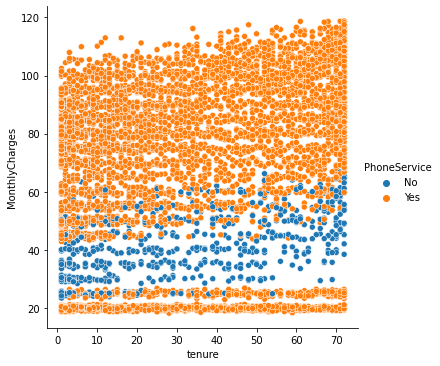

In [15]:
sns.relplot(x='tenure', y='MonthlyCharges', hue='PhoneService', data=df)

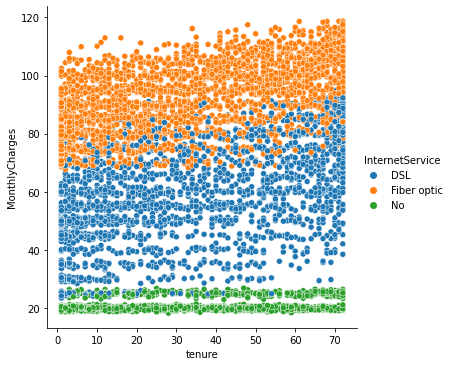

In [16]:
sns.relplot(x='tenure', y='MonthlyCharges', hue='InternetService', data=df)

In [ ]:
# do it a little manually the first time:

In [17]:
x_phone_tenure = df['tenure'][df['PhoneService'] == 'Yes']
x_phone_totalcharges = df['TotalCharges'][df['PhoneService'] == 'Yes']
y_phone_monthlycharges = df['MonthlyCharges'][df['PhoneService'] == 'Yes']

In [18]:
x_no_phone_tenure = df['tenure'][df['PhoneService'] == 'No']
x_no_phone_totalcharges = df['TotalCharges'][df['PhoneService'] == 'No']
y_no_phone_monthlycharges = df['MonthlyCharges'][df['PhoneService'] == 'No']

In [19]:
r, p = stats.pearsonr(x_phone_tenure, y_phone_monthlycharges)
print(f'Pearson Correlation is calculated at {r} with a p value of {p}')
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')

Pearson Correlation is calculated at 0.24419396575193372 with a p value of 6.828016037598485e-87
 p is less than our alpha and we can reject the null hypothesis


In [20]:
r, p = stats.pearsonr(x_no_phone_tenure, y_no_phone_monthlycharges)
print(f'Pearson Correlation is calculated at {r} with a p value of {p}')
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')

Pearson Correlation is calculated at 0.5924298640568981 with a p value of 1.1732739032893169e-65
 p is less than our alpha and we can reject the null hypothesis


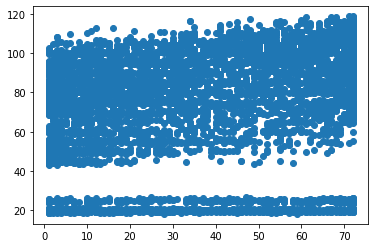

In [21]:
plt.scatter(x_phone_tenure, y_phone_monthlycharges)

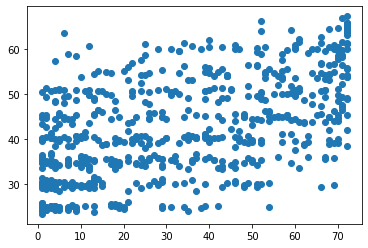

In [22]:
plt.scatter(x_no_phone_tenure, y_no_phone_monthlycharges)

In [ ]:
# make the columns more explicit for our dictionary keys and labels

In [23]:
df['InternetService'] = 'Internet Service: ' + df['InternetService']
df['PhoneService'] = 'Phone Service: ' + df['PhoneService']
df['Internet_and_Phone'] = df['InternetService'] + df['PhoneService']

In [24]:
df['Internet_and_Phone'].value_counts()

Internet Service: Fiber opticPhone Service: Yes    3096
Internet Service: DSLPhone Service: Yes            1736
Internet Service: NoPhone Service: Yes             1520
Internet Service: DSLPhone Service: No              680
Name: Internet_and_Phone, dtype: int64

In [ ]:
# lets use dictionary structures and loops to make our life a little easier

In [25]:
x = {}
y = {}
control = ['InternetService', 'PhoneService', 'Internet_and_Phone']
for cntrl in control:
    for val in df[cntrl].unique():
        x[val] = {}
        y[val] = {}
        x[val]['tenure'] = df['tenure'][df[cntrl] == val]
        y[val]['TotalCharges'] = df['TotalCharges'][df[cntrl] == val]
        y[val]['MonthlyCharges'] = df['MonthlyCharges'][df[cntrl] == val]

In [27]:
x['Internet Service: DSL'].keys()

dict_keys(['tenure'])

For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.42973713019458293 with a p value of 3.5760374321528034e-109
 p is less than our alpha and we can reject the null hypothesis


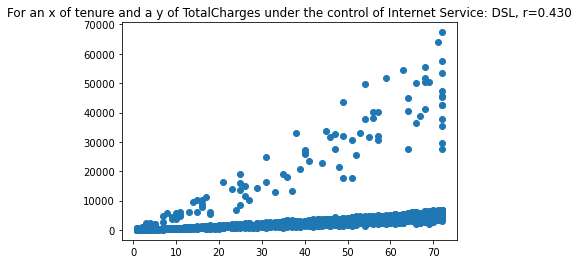

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.5197012004433118 with a p value of 2.8895185791324596e-167
 p is less than our alpha and we can reject the null hypothesis


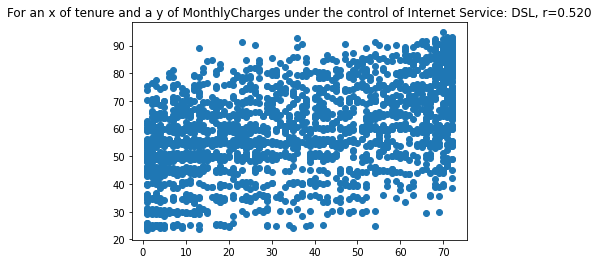

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.41956746367799425 with a p value of 2.7703425752729443e-132
 p is less than our alpha and we can reject the null hypothesis


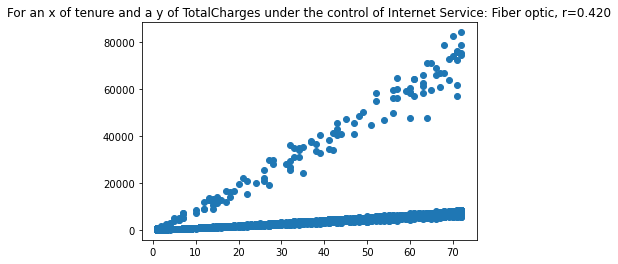

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.6246206176175606 with a p value of 0.0
 p is less than our alpha and we can reject the null hypothesis


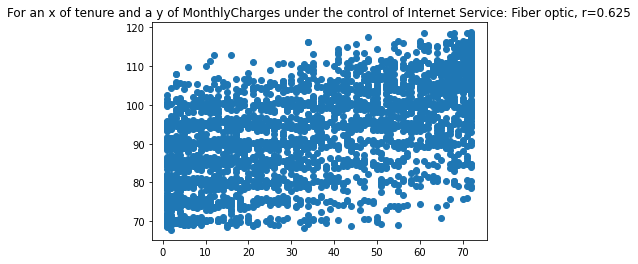

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.4148982449188868 with a p value of 2.6362929034457744e-64
 p is less than our alpha and we can reject the null hypothesis


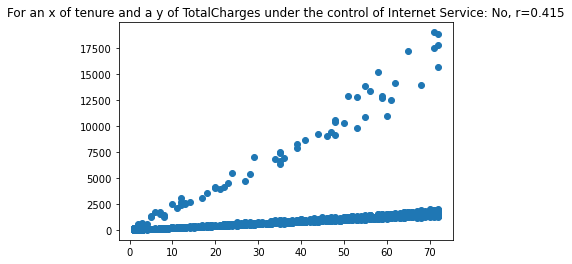

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.34618773548574805 with a p value of 4.896604599947503e-44
 p is less than our alpha and we can reject the null hypothesis


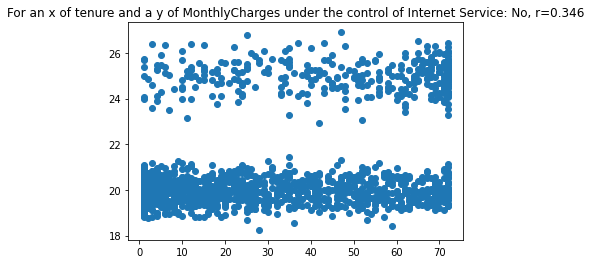

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.4226832717574847 with a p value of 7.591789299426921e-31
 p is less than our alpha and we can reject the null hypothesis


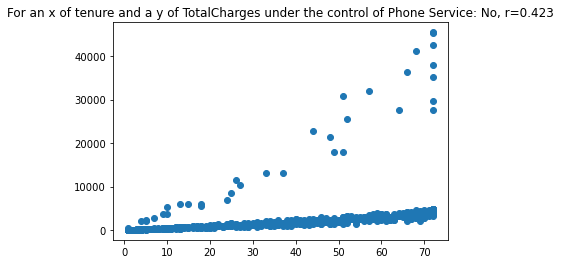

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.5924298640568981 with a p value of 1.1732739032893169e-65
 p is less than our alpha and we can reject the null hypothesis


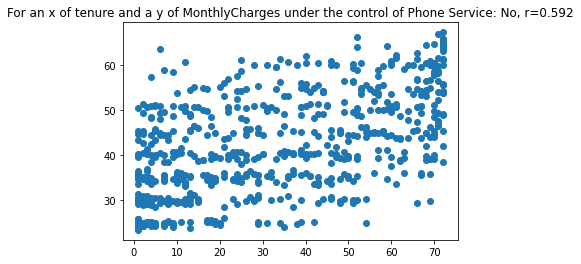

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.38791463663240616 with a p value of 3.4773365963129657e-227
 p is less than our alpha and we can reject the null hypothesis


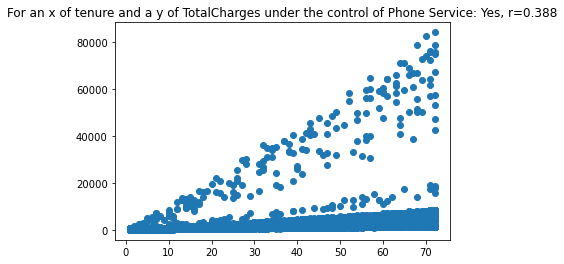

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.24419396575193372 with a p value of 6.828016037598485e-87
 p is less than our alpha and we can reject the null hypothesis


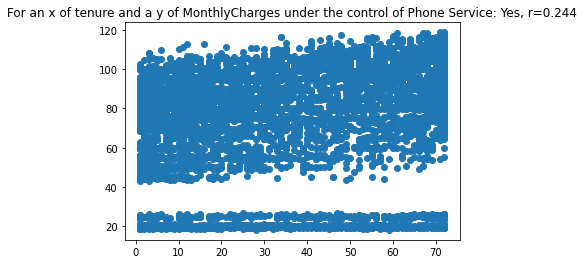

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.4226832717574847 with a p value of 7.591789299426921e-31
 p is less than our alpha and we can reject the null hypothesis


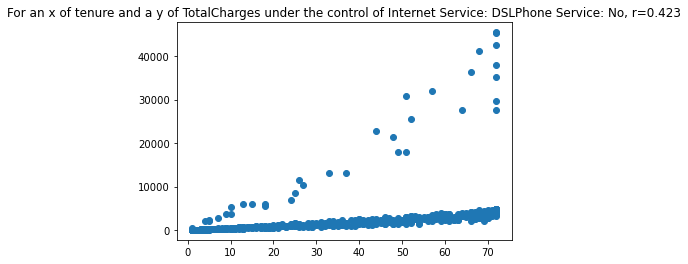

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.5924298640568981 with a p value of 1.1732739032893169e-65
 p is less than our alpha and we can reject the null hypothesis


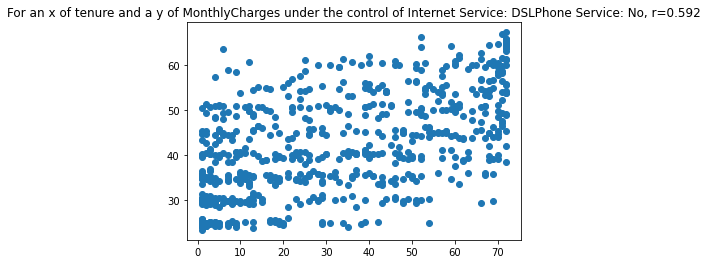

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.43232171163136485 with a p value of 5.4868545195383044e-80
 p is less than our alpha and we can reject the null hypothesis


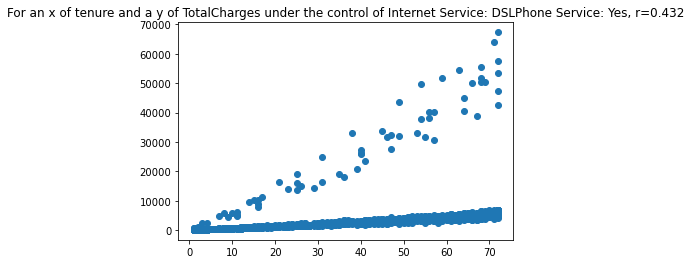

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.6580939590305946 with a p value of 5.781402074463393e-216
 p is less than our alpha and we can reject the null hypothesis


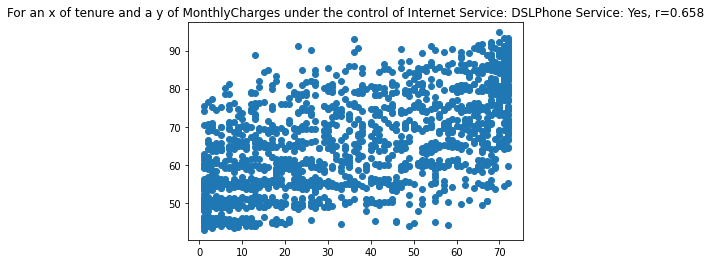

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.41956746367799425 with a p value of 2.7703425752729443e-132
 p is less than our alpha and we can reject the null hypothesis


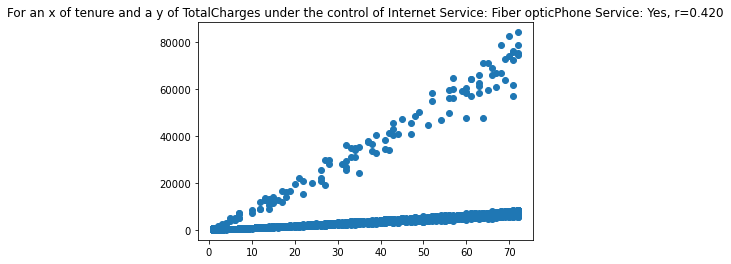

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.6246206176175606 with a p value of 0.0
 p is less than our alpha and we can reject the null hypothesis


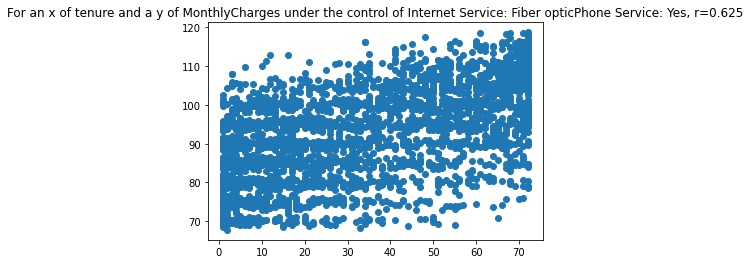

------------------------------------
------------------------------------
------------------------------------
For customers with {key}: 
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.4148982449188868 with a p value of 2.6362929034457744e-64
 p is less than our alpha and we can reject the null hypothesis


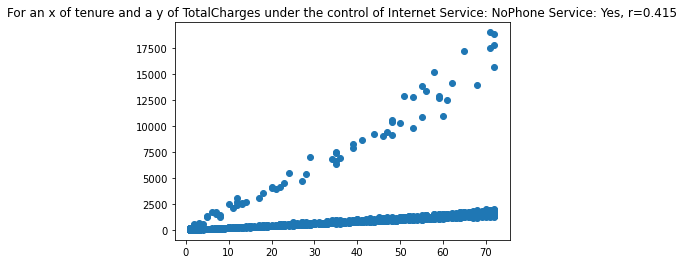

------------------------------------
------------------------------------
------------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.34618773548574805 with a p value of 4.896604599947503e-44
 p is less than our alpha and we can reject the null hypothesis


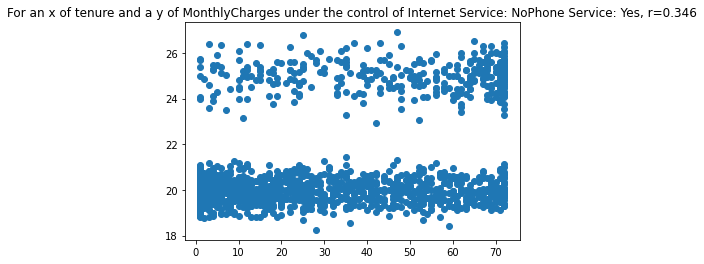

------------------------------------
------------------------------------
------------------------------------


<Figure size 432x288 with 0 Axes>

In [31]:
for key in y:
    print('For customers with {key}: ')
    for subkey in y[key]:
        print(f'For an x of tenure and a y of {subkey}: ')
        r, p = stats.pearsonr(x[key]['tenure'], y[key][subkey])
        print(f'Pearson Correlation is calculated at {r} with a p value of {p}')
        if p < 0.05:
            print(f' p is less than our alpha and we can reject the null hypothesis')
        plt.title(f'For an x of tenure and a y of {subkey} under the control of {key}, r={r:.3f}')
        plt.scatter(x[key]['tenure'], y[key][subkey])
        plt.show()
        plt.clf()
        print('------------------------------------')
        print('------------------------------------')
        print('------------------------------------')

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

2. Use the employees database.

    Is there a relationship between how long an employee has been with the company and their salary?
    Is there a relationship between how long an employee has been with the company and the number of titles they have had?


<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

In [32]:
# get our environment set up

In [33]:
from env import usr,pw,host
from sqlalchemy import create_engine
def get_connection(db, user, host, password):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return create_engine(url)

In [ ]:
# set up db

In [34]:
db = 'employee'

In [35]:
# set up queries

In [36]:
query = 'SELECT * FROM employees'
query2 = 'SELECT * FROM salaries'
query3 = 'SELECT * FROM titles'

In [37]:
# get connection

In [38]:
conn = get_connection('employees', usr, host, pw)

In [39]:
# get employees, salaries, titles

In [40]:
employees = pd.read_sql(query, conn)
salaries = pd.read_sql(query2, conn)
titles = pd.read_sql(query3, conn)

In [ ]:
# aggregate titles by employee number

In [41]:
countref = titles.groupby('emp_no').count()[['title']].rename(columns={'title': 'titlecount'})

In [42]:
# join that to titles

In [43]:
merged = pd.merge(titles, countref, how='left', on='emp_no')

In [44]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      443308 non-null  int64 
 1   title       443308 non-null  object
 2   from_date   443308 non-null  object
 3   to_date     443308 non-null  object
 4   titlecount  443308 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 20.3+ MB


In [45]:
merged['to_date'] = merged['to_date'].apply(lambda x: pd.datetime.now() if str(x).startswith('9999') else pd.to_datetime(x))

<ipython-input-45-fa881b3429af>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  merged['to_date'] = merged['to_date'].apply(lambda x: pd.datetime.now() if str(x).startswith('9999') else pd.to_datetime(x))


In [46]:
merged['from_date'] = merged['from_date'].apply(lambda x: pd.datetime.now() if str(x).startswith('9999') else pd.to_datetime(x))

In [ ]:
# convert the from and to dates to pandas datetimes so we can subtract them

In [47]:
merged['tenure'] = (merged.to_date - merged.from_date).astype(int)

In [49]:
merged = pd.merge(employees, merged, how='left', on='emp_no')

In [51]:
merged = pd.merge(merged, salaries, how='left', on='emp_no')

In [ ]:
# join it to the original employees dataframe

In [ ]:
# and join that to salaries so we have all our data in one place

In [ ]:
# check for nulls in the dataframe

In [52]:
merged.isnull().values.any()

False

In [ ]:
# save it so you don't neeed to do all that again
# merged_sal.to_csv('merged_sal.csv')

In [ ]:
# correlation for tenure vs salary?

In [54]:
r, p =  stats.pearsonr(merged['tenure'], merged['salary'])
print(f'Pearson Correlation is calculated at {r:.3f} with a p value of {p:e}')
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')

Pearson Correlation is calculated at 0.028 with a p value of 0.000000e+00
 p is less than our alpha and we can reject the null hypothesis


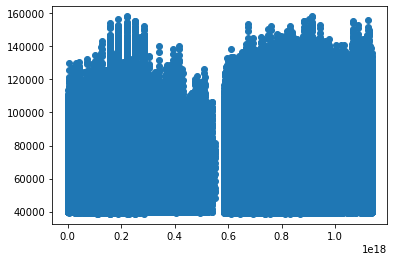

In [55]:
plt.scatter(merged['tenure'], merged['salary'])

In [ ]:
# correlation for tenure vs number of titles held?

In [56]:
r, p =  stats.pearsonr(merged['tenure'], merged['titlecount'])
print(f'Pearson Correlation is calculated at {r:.3f} with a p value of {p:e}')
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')

Pearson Correlation is calculated at -0.392 with a p value of 0.000000e+00
 p is less than our alpha and we can reject the null hypothesis


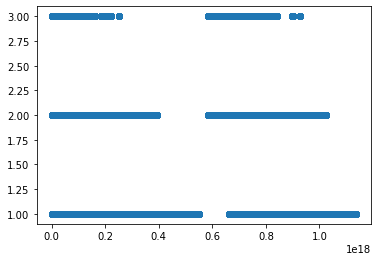

In [57]:
plt.scatter(merged['tenure'], merged['titlecount'])

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

3. Use the `sleepstudy` data. Is there a relationship between days and reaction time?

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

In [58]:
# get the sleepstudy from the pydataset

In [59]:
from pydataset import data

In [60]:
df = data('sleepstudy')

In [61]:
# get the doc to remind ourself what's here

In [62]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [63]:
r, p = stats.pearsonr(df['Days'], df['Reaction'])
print(r)

0.5352302262650253


In [64]:
print(p)

9.894096322214812e-15


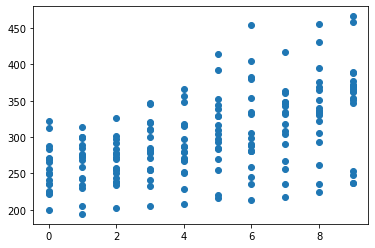

In [66]:
plt.scatter(df['Days'], df['Reaction'])

In [ ]:
# let's separate it out by subject like we did with telco:

In [ ]:
# now let's use those dictionaries to calculate our pearson's r and visualize our x and y

In [67]:
x = {}
y = {}
control = ['Subject']
for cntrl in control:
    for val in df[cntrl].unique():
        x[val] = {}
        y[val] = {}
        x[val]['Days'] = df['Days'][df[cntrl] == val]
        y[val]['Reaction'] = df['Reaction'][df[cntrl] == val]

For subject number 308: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.8255381278369811 with a p value of 0.003264657258780574
 p is less than our alpha and we can reject the null hypothesis


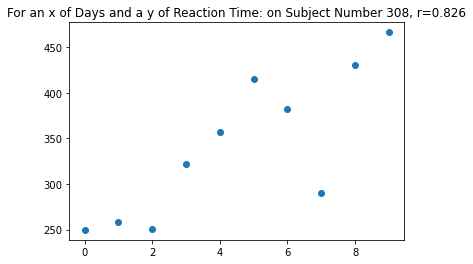

------------------------------------
------------------------------------
------------------------------------
For subject number 309: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.633349342428891 with a p value of 0.049314430462486625
 p is less than our alpha and we can reject the null hypothesis


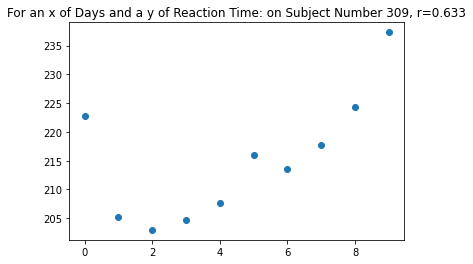

------------------------------------
------------------------------------
------------------------------------
For subject number 310: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.8470799097781476 with a p value of 0.001980757448526521
 p is less than our alpha and we can reject the null hypothesis


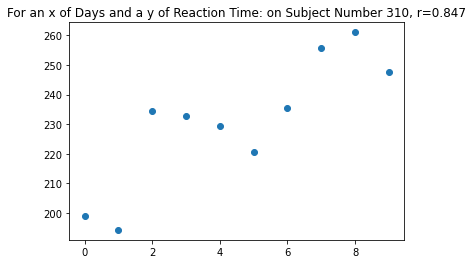

------------------------------------
------------------------------------
------------------------------------
For subject number 330: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.39754302879767095 with a p value of 0.2552687371113861


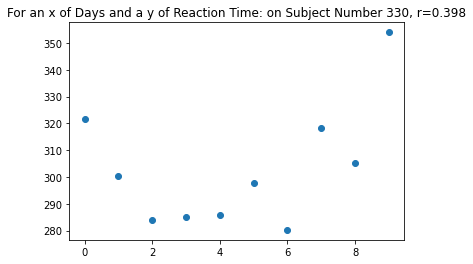

------------------------------------
------------------------------------
------------------------------------
For subject number 331: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.5852473464607693 with a p value of 0.07550229345444902


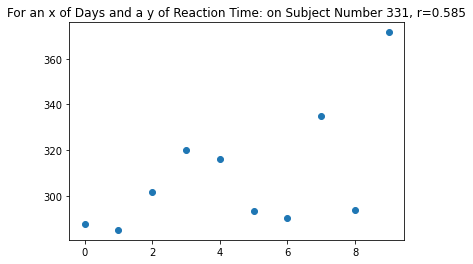

------------------------------------
------------------------------------
------------------------------------
For subject number 332: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.4504209805409442 with a p value of 0.1914425792881938


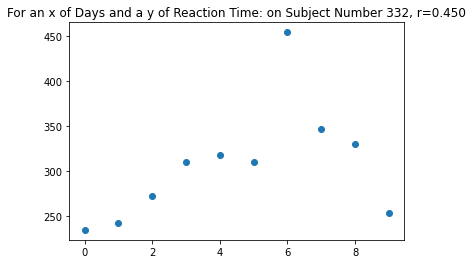

------------------------------------
------------------------------------
------------------------------------
For subject number 333: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.9205376478914586 with a p value of 0.0001583426320639572
 p is less than our alpha and we can reject the null hypothesis


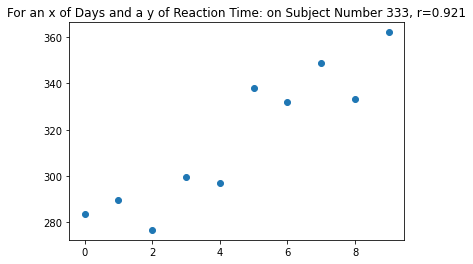

------------------------------------
------------------------------------
------------------------------------
For subject number 334: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.8863382869649219 with a p value of 0.0006352349813355274
 p is less than our alpha and we can reject the null hypothesis


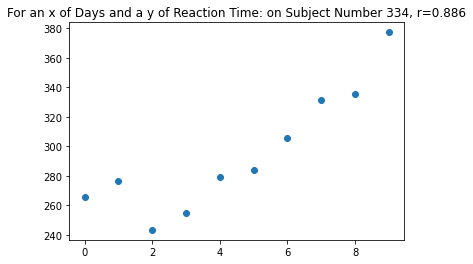

------------------------------------
------------------------------------
------------------------------------
For subject number 335: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at -0.6305375519270039 with a p value of 0.050647314509293585


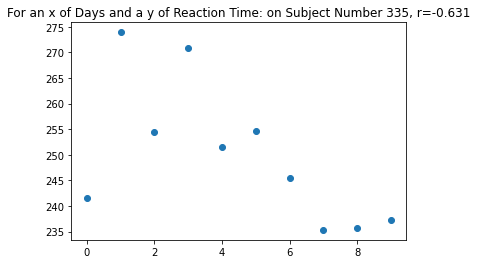

------------------------------------
------------------------------------
------------------------------------
For subject number 337: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.9661243878155332 with a p value of 5.530467287892673e-06
 p is less than our alpha and we can reject the null hypothesis


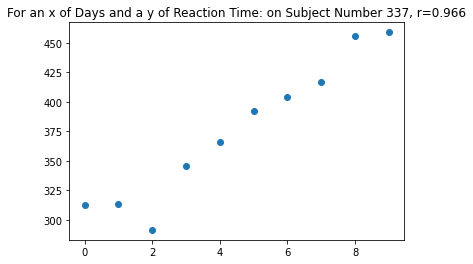

------------------------------------
------------------------------------
------------------------------------
For subject number 349: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.9514873771740564 with a p value of 2.2850058977631775e-05
 p is less than our alpha and we can reject the null hypothesis


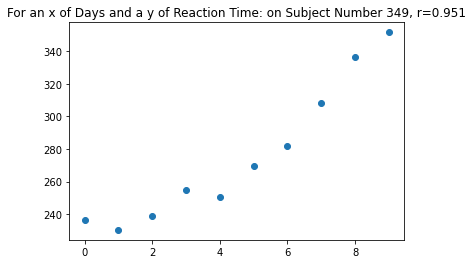

------------------------------------
------------------------------------
------------------------------------
For subject number 350: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.931989016488642 with a p value of 8.617903322247679e-05
 p is less than our alpha and we can reject the null hypothesis


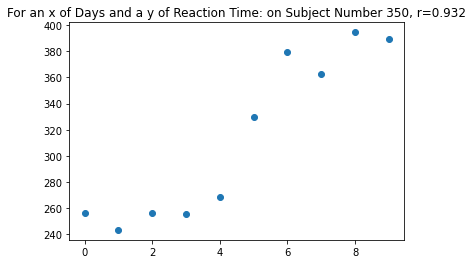

------------------------------------
------------------------------------
------------------------------------
For subject number 351: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.6721594392859361 with a p value of 0.033245435207105205
 p is less than our alpha and we can reject the null hypothesis


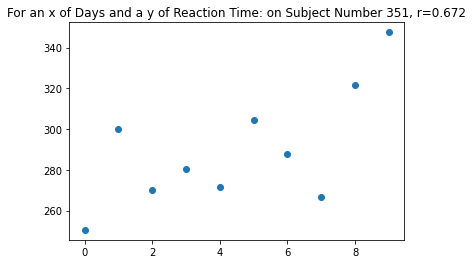

------------------------------------
------------------------------------
------------------------------------
For subject number 352: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.8628721310076778 with a p value of 0.0013066677009118271
 p is less than our alpha and we can reject the null hypothesis


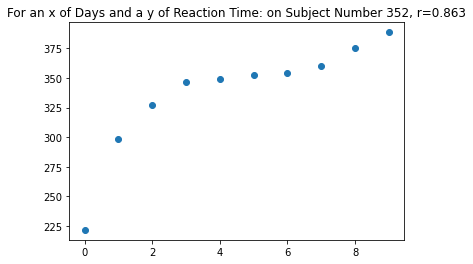

------------------------------------
------------------------------------
------------------------------------
For subject number 369: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.9171840023764399 with a p value of 0.0001860407115799808
 p is less than our alpha and we can reject the null hypothesis


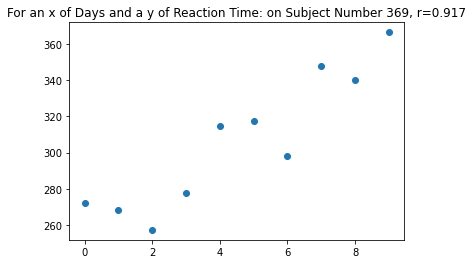

------------------------------------
------------------------------------
------------------------------------
For subject number 370: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.923312993531196 with a p value of 0.0001378250596291528
 p is less than our alpha and we can reject the null hypothesis


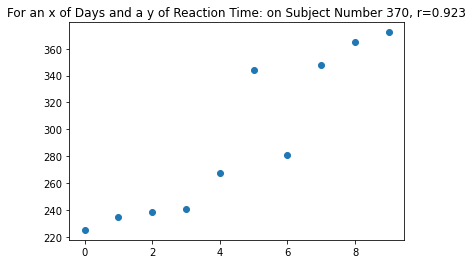

------------------------------------
------------------------------------
------------------------------------
For subject number 371: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.7620502625234488 with a p value of 0.010404243293173
 p is less than our alpha and we can reject the null hypothesis


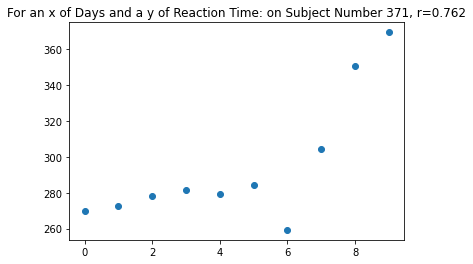

------------------------------------
------------------------------------
------------------------------------
For subject number 372: 
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.9548838048833137 with a p value of 1.7163232198090347e-05
 p is less than our alpha and we can reject the null hypothesis


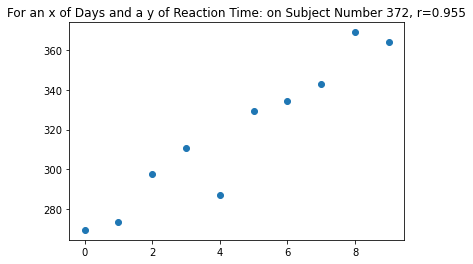

------------------------------------
------------------------------------
------------------------------------


<Figure size 432x288 with 0 Axes>

In [69]:
corr = {}
for key in y:
    print(f'For subject number {key}: ')
    print(f'For an x of Days and a y of Reaction Time: ')
    r, p = stats.pearsonr(x[key]['Days'], y[key]['Reaction'])
    print(f'Pearson Correlation is calculated at {r} with a p value of {p}')
    if p < 0.05:
        print(f' p is less than our alpha and we can reject the null hypothesis')
    plt.title(f'For an x of Days and a y of Reaction Time: on Subject Number {key}, r={r:.3f}')
    plt.scatter(x[key]['Days'], y[key]['Reaction'])
    plt.show()
    plt.clf()
    print('------------------------------------')
    print('------------------------------------')
    print('------------------------------------')